# PHASE 4 PROJECT

# TIME SERIES MODELLING FOR REAL ESTATE USING ZILLOW DATA 

## BUSINESS UNDERSTANDING

### INTRODUCTION 

Real estate is real property that includes land and anything permanently attached to it or built on it, whether natural or man-made.
In real estate there are five main categories which include residential, commercial, industrial, raw land, and special use.
Investing in real estate includes purchasing a home, rental property, or land. Indirect investment in real estate can be made via REITs or through pooled real estate investment.

Real estate encompasses the land, plus any permanent man-made additions, such as houses and other buildings. Any additions or changes to the land that affects the property's value are called an improvement. In most times improvements are for the better and also increases its market value. The total capital and labor used to build the improvement represent a sizable fixed investment. Though a building can be razed, improvements like drainage, electricity, water and sewer systems tend to be permanent. Hence you get the rights inherent to its ownership and usage.

## Types of Real Estate:-

* Residential real estate: Any property used for residential purposes. Examples include single-family homes, condos, cooperatives, duplexes, townhouses, and multifamily residences.

* Commercial real estate: Any property used exclusively for business purposes, such as apartment complexes, gas stations, grocery stores, hospitals, hotels, offices, parking facilities, restaurants, shopping centers, stores, and theaters.

* Industrial real estate: Any property used for manufacturing, production, distribution, storage, and research and development.

* Land: Includes undeveloped property, vacant land, and agricultural lands such as farms, orchards, ranches, and timberland.

* Special purpose: Property used by the public, such as cemeteries, government buildings, libraries, parks, places of worship, and schools.



## PROBLEM STATEMENT

You are a consultant for a Zillow real-estate investment firm. As a consultant your work is to help clients who are buyers or renters to get which property is best to invest in and in which zipcodes.


## DEFINING A METRIC OF SUCCESS

A model will be consedered successful when its able to predict the best zipcodes to invest in as per their profit/return on investment (ROI)

# OBJECTIVES

#### MAIN OBJECTIVE

* To develop a time series model that would predict the top five best Region codes to invest in

#### SPECIFIC OBJECTIVE

* To look at the profits it brings over a period of time

* To look at the RMSE of the model to see how well your model is performing 

* To look at which zipcodes are good to invest in

## DATA UNDERSTANDING

This analysis will be using data from Zillow dataset that is from the zillow. The dataset has 14723 rows and 272 columns.The dataset includes information such as RegionID,	RegionName,	City, State, Metro,	CountyName and SizeRank.

* RegionID : Represents a unique ID for each region.
* RegionName : Represents the name of the region/ also the zipcode	
* City : The city where the region is located.
* State :	State where the region is located.
* Metro :	It is the metropolitan area where the region is located 
* CountyName : The name of the county where the region is located.
* SizeRank : Size of the region compared to other regions in the dataset.	
* 1996 upto 2018 : Represents the median home price for the region in months and years.

## Importing the relevant Libraries

In [2]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
from matplotlib.pylab import rcParams
from statsmodels.tsa.arima.model import  ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error as MSE
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import pmdarima as pm
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
sns.set()

### Reading the data in the dataset

In [3]:
#Loading the dataset
df = pd.read_csv('zillow_data.csv')
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [4]:
#Reading the first 10 rows
df.head(10)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
5,91733,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
8,91940,77449,Katy,TX,Houston,Harris,9,95400.0,95600.0,95800.0,...,166800,167400,168400,169600,170900,172300,173300,174200,175400,176200
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500


In [5]:
#Reading the last 10 rows
df.tail(10)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
14713,59187,3765,Haverhill,NH,Claremont,Grafton,14714,80800.0,80100.0,79400.0,...,119800,120000,120800,121600,122600,123400,124400,125500,126600,127500
14714,94711,84781,Pine Valley,UT,St. George,Washington,14715,135900.0,136300.0,136600.0,...,241100,243200,244300,248900,254600,257600,258000,260600,264700,266800
14715,62556,12429,Esopus,NY,Kingston,Ulster,14716,78300.0,78300.0,78200.0,...,164200,166600,170000,171000,170700,171300,172400,173600,175800,177500
14716,99032,97028,Rhododendron,OR,Portland,Clackamas,14717,136200.0,136600.0,136800.0,...,332600,332900,335600,338900,340500,341000,342300,345000,348000,349300
14717,62697,12720,Bethel,NY,NaN,Sullivan,14718,62500.0,62600.0,62700.0,...,122200,122700,122300,122000,122200,122800,123200,123200,120700,117700
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400
14722,95851,89155,Mesquite,NV,Las Vegas,Clark,14723,176400.0,176300.0,176100.0,...,333800,336400,339700,343800,346800,348900,350400,353000,356000,357200


In [6]:
#Checking each columns datatypes
#looking at the column and datatypes in zillow_data using .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [7]:
# checking  the first 10 columns using .info
df.iloc[:,:10].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    14723 non-null  int64  
 1   RegionName  14723 non-null  int64  
 2   City        14723 non-null  object 
 3   State       14723 non-null  object 
 4   Metro       13680 non-null  object 
 5   CountyName  14723 non-null  object 
 6   SizeRank    14723 non-null  int64  
 7   1996-04     13684 non-null  float64
 8   1996-05     13684 non-null  float64
 9   1996-06     13684 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 1.1+ MB


In [8]:
#previewing the number of rows and columns
df.shape

(14723, 272)

In [9]:
#The describe() function does a summary of statistics that has to do with the DataFrame.
df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,...,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04
mean,81075.010052,48222.348706,7362.000000,1.182991e+05,1.184190e+05,1.185374e+05,1.186531e+05,1.187803e+05,1.189275e+05,1.191205e+05,...,2.733354e+05,2.748658e+05,2.764646e+05,2.780332e+05,2.795209e+05,2.810953e+05,2.826571e+05,2.843687e+05,2.865114e+05,2.880399e+05
std,31934.118525,29359.325439,4250.308342,8.600251e+04,8.615567e+04,8.630923e+04,8.646795e+04,8.665094e+04,8.687208e+04,8.715185e+04,...,3.603984e+05,3.614678e+05,3.627563e+05,3.644610e+05,3.656003e+05,3.670454e+05,3.695727e+05,3.717739e+05,3.724612e+05,3.720544e+05
min,58196.000000,1001.000000,1.000000,1.130000e+04,1.150000e+04,1.160000e+04,1.180000e+04,1.180000e+04,1.200000e+04,1.210000e+04,...,1.440000e+04,1.450000e+04,1.470000e+04,1.480000e+04,1.450000e+04,1.430000e+04,1.410000e+04,1.390000e+04,1.380000e+04,1.380000e+04
25%,67174.500000,22101.500000,3681.500000,6.880000e+04,6.890000e+04,6.910000e+04,6.920000e+04,6.937500e+04,6.950000e+04,6.960000e+04,...,1.269000e+05,1.275000e+05,1.282000e+05,1.287000e+05,1.292500e+05,1.299000e+05,1.306000e+05,1.310500e+05,1.319500e+05,1.324000e+05
50%,78007.000000,46106.000000,7362.000000,9.950000e+04,9.950000e+04,9.970000e+04,9.970000e+04,9.980000e+04,9.990000e+04,9.995000e+04,...,1.884000e+05,1.896000e+05,1.905000e+05,1.914000e+05,1.925000e+05,1.934000e+05,1.941000e+05,1.950000e+05,1.967000e+05,1.981000e+05
75%,90920.500000,75205.500000,11042.500000,1.432000e+05,1.433000e+05,1.432250e+05,1.432250e+05,1.435000e+05,1.437000e+05,1.439000e+05,...,3.050000e+05,3.066500e+05,3.085000e+05,3.098000e+05,3.117000e+05,3.134000e+05,3.151000e+05,3.168500e+05,3.188500e+05,3.211000e+05
max,753844.000000,99901.000000,14723.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


In [10]:
# Calculating %Return On Investment and also creating a column for it
df["%ROI"] = (((df["2018-04"] / df["2012-01"]) ** (1 / 6)) - 1) * 100
print (df)

       RegionID  RegionName                 City State              Metro   
0         84654       60657              Chicago    IL            Chicago  \
1         90668       75070             McKinney    TX  Dallas-Fort Worth   
2         91982       77494                 Katy    TX            Houston   
3         84616       60614              Chicago    IL            Chicago   
4         93144       79936              El Paso    TX            El Paso   
...         ...         ...                  ...   ...                ...   
14718     58333        1338             Ashfield    MA    Greenfield Town   
14719     59107        3293            Woodstock    NH          Claremont   
14720     75672       40404                Berea    KY           Richmond   
14721     93733       81225  Mount Crested Butte    CO                NaN   
14722     95851       89155             Mesquite    NV          Las Vegas   

      CountyName  SizeRank   1996-04   1996-05   1996-06  ...  2017-08   
0

This code first creates a sample DataFrame df with two columns "2012-01" and "2018-04." Then, it calculates the %ROI by taking the sixth root of the ratio of "2018-04" to "2012-01" and subtracting 1, followed by multiplying by 100 to get the percentage. Finally, it adds the "%ROI" column to the DataFrame and displays the result.

In [11]:
# Creating a column of actual Return On Investment price
df['ROI price'] = df["2018-04"] - df["2012-01"]
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,%ROI,ROI price
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,5.730851,292900.0
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,312500,314100,315000,316600,318100,319600,321100,321800,8.285652,122200.0
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320200,320400,320800,321200,321200,323000,326900,329900,4.828700,81300.0
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,5.856559,378100.0
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,120000,120300,120300,120300,120300,120500,121000,121500,1.305960,9100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,218600,218500,218100,216400,213100,209800,209200,209300,3.067284,34700.0
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,212200,215200,214300,213100,213700,218300,222700,225800,3.349430,40500.0
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,124600,126700,128800,130600,131700,132500,133000,133400,3.727615,26300.0
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,682400,695600,695500,694700,706400,705300,681500,664400,4.394205,151100.0


The dataframe it will contain the absolute difference between the ending value in the "2018-04" column and the beginning value in the "2012-01" column. This will give you the actual return on investment (ROI) in terms of price change over the specified time period,

### CLEANING THE DATASET

In [12]:
#checking for missing values
df.isna().sum()

RegionID         0
RegionName       0
City             0
State            0
Metro         1043
              ... 
2018-02          0
2018-03          0
2018-04          0
%ROI           224
ROI price      224
Length: 274, dtype: int64

In [13]:
#dropping the metro missing values this is because when we looked at the first 10 columns they did not have any 
# missing values and looking at out dataset it has 14723 rows × 274 columns which can not affect the data 
df.dropna(axis= 0, subset= ['Metro'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13680 entries, 0 to 14722
Columns: 274 entries, RegionID to ROI price
dtypes: float64(221), int64(49), object(4)
memory usage: 28.7+ MB


In [14]:
#looking for duplicates (false means row has not been duplicated and true means that the row has been duplicated)
df.duplicated().any()

False

## Data preprocessing

There are many rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

In [15]:
melted = pd.melt(df, 
                 id_vars =['RegionID', 'RegionName', 'SizeRank', 'City', 'State', 'Metro', 'CountyName', 'ROI price','%ROI'], 
                 var_name='Date')
melted = melted.rename(columns={'RegionName': 'RegionCode'})

# Convert Date to datetime
melted['Date']  #= pd.to_datetime(['Date'], format='%Y-%m')

melted.head(10)


,RegionID,RegionCode,SizeRank,City,State,Metro,CountyName,ROI price,%ROI,Date,value
0,84654,60657,1,Chicago,IL,Chicago,Cook,292900.0,5.730851,1996-04,334200.0
1,90668,75070,2,McKinney,TX,Dallas-Fort Worth,Collin,122200.0,8.285652,1996-04,235700.0
2,91982,77494,3,Katy,TX,Houston,Harris,81300.0,4.828700,1996-04,210400.0
3,84616,60614,4,Chicago,IL,Chicago,Cook,378100.0,5.856559,1996-04,498100.0
4,93144,79936,5,El Paso,TX,El Paso,El Paso,9100.0,1.305960,1996-04,77300.0
5,91733,77084,6,Houston,TX,Houston,Harris,51100.0,6.405773,1996-04,95000.0
6,61807,10467,7,New York,NY,New York,Bronx,111500.0,5.308623,1996-04,152900.0
7,84640,60640,8,Chicago,IL,Chicago,Cook,217500.0,5.575214,1996-04,216500.0
8,91940,77449,9,Katy,TX,Houston,Harris,60200.0,7.215601,1996-04,95400.0
9,97564,94109,10,San Francisco,CA,San Francisco,San Francisco,1568800.0,9.234772,1996-04,766000.0


In [16]:
# looking at the number of rows and columns
melted.shape

(3625200, 11)

The number of rows and columns have increased 3625200 rows and 10 columns

In [17]:
#looking for duplicates in the dataset
melted.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
3625195    False
3625196    False
3625197    False
3625198    False
3625199    False
Length: 3625200, dtype: bool

there are no duplicates in the dataset

In [18]:
#looking for missing values
melted.isna().sum()

RegionID           0
RegionCode         0
SizeRank           0
City               0
State              0
Metro              0
CountyName         0
ROI price      55650
%ROI           55650
Date               0
value         116519
dtype: int64

In [19]:
#filling missing values in metro with 0
melted["ROI price"] = melted["ROI price"].fillna(0)

In [20]:
#filling missing values in %ROI with 0
melted["%ROI"] = melted["%ROI"].fillna(0)

In [21]:
#filling missing values in value with 0
melted["value"] = melted["value"].fillna(0)

In [22]:
melted["Date"] = melted["Date"].fillna(0)

In [23]:
#checking if the missing values have been filled
melted.isna().sum()

RegionID      0
RegionCode    0
SizeRank      0
City          0
State         0
Metro         0
CountyName    0
ROI price     0
%ROI          0
Date          0
value         0
dtype: int64

In [24]:
#The describe() function does a summary of statistics that has to do with the DataFrame.
melted.describe()

,RegionID,RegionCode,SizeRank,ROI price,%ROI,value
count,3.625200e+06,3.625200e+06,3.625200e+06,3.625200e+06,3.625200e+06,3.625200e+06
mean,8.105715e+04,4.779722e+04,7.098672e+03,9.234366e+04,5.501055e+00,2.070931e+05
std,3.299957e+04,2.967580e+04,4.230955e+03,1.671229e+05,3.734062e+00,2.447204e+05
min,5.819600e+04,1.001000e+03,1.000000e+00,-6.940000e+04,-8.800055e+00,0.000000e+00
25%,6.679950e+04,2.112650e+04,3.429750e+03,2.330000e+04,2.821573e+00,9.720000e+04
50%,7.765550e+04,4.532400e+04,6.939000e+03,4.985000e+04,4.704290e+00,1.481000e+05
75%,9.095925e+04,7.520925e+04,1.071150e+04,1.024000e+05,7.680095e+00,2.399000e+05
max,7.538440e+05,9.990100e+04,1.472300e+04,5.827700e+06,2.282181e+01,1.931490e+07


## EDA(EXPLORATORY DATA ANALYSIS)

### Univariate Analysis

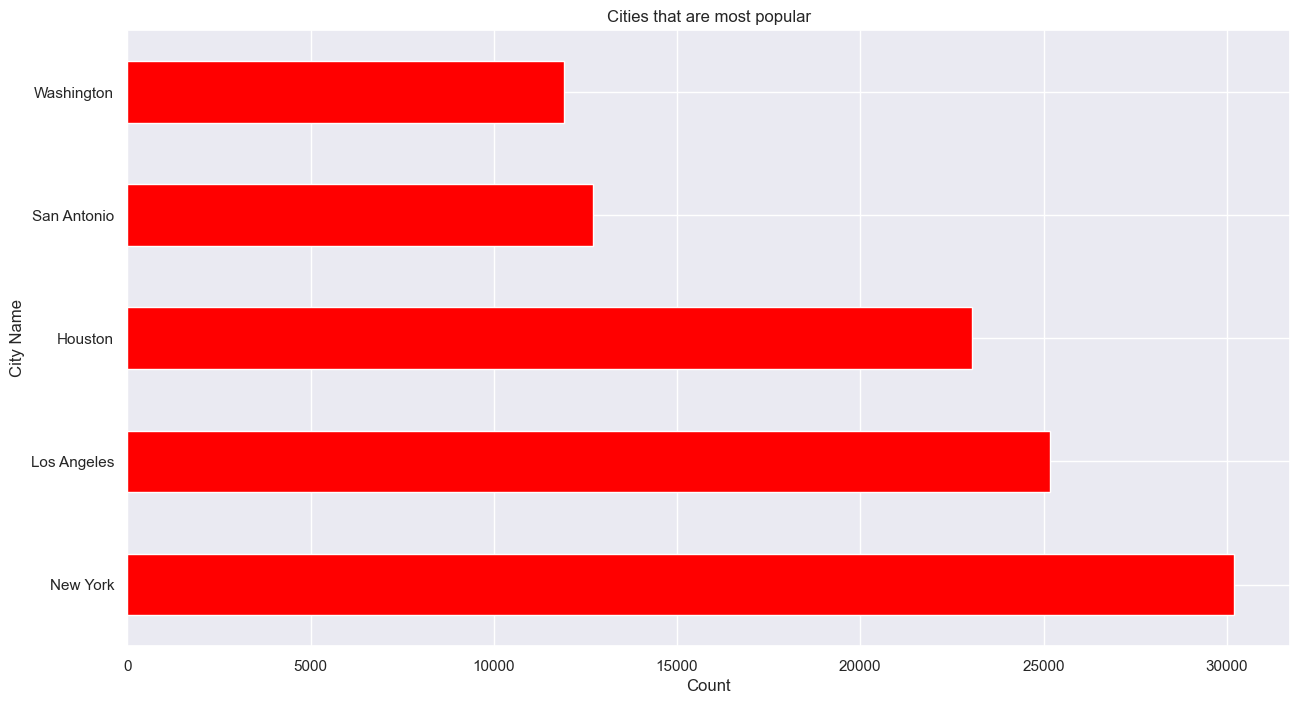

In [25]:
# plotting the 5 most popular cities in the dataset
plt.figure(figsize=(15, 8))
top_cities = melted.City.value_counts()[:5]
top_cities.plot(kind="barh", color='red')  
plt.xlabel("Count")
plt.ylabel("City Name")
plt.title("Cities that are most popular")
plt.show() 

From the above plot we can see the top 5 most popular cities and New York is leading with the highest number.

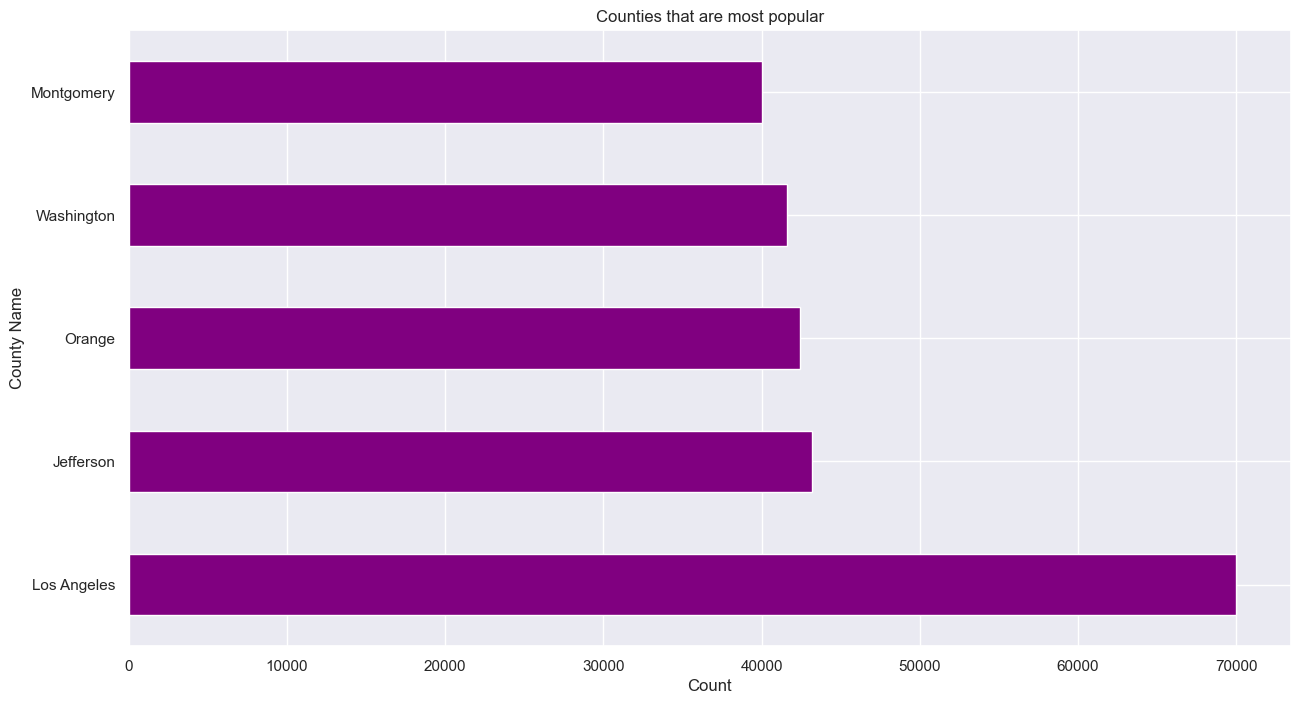

In [26]:
# plotting the 5 most popular counties in the dataset
plt.figure(figsize=(15, 8))
top_counties = melted.CountyName.value_counts()[:5]
top_counties.plot(kind="barh", color='purple')  
plt.xlabel("Count")
plt.ylabel("County Name")
plt.title("Counties that are most popular")
plt.show() 

From the above plot we can see the top 5 most popular counties and Los Angeles is leading with the highest number.

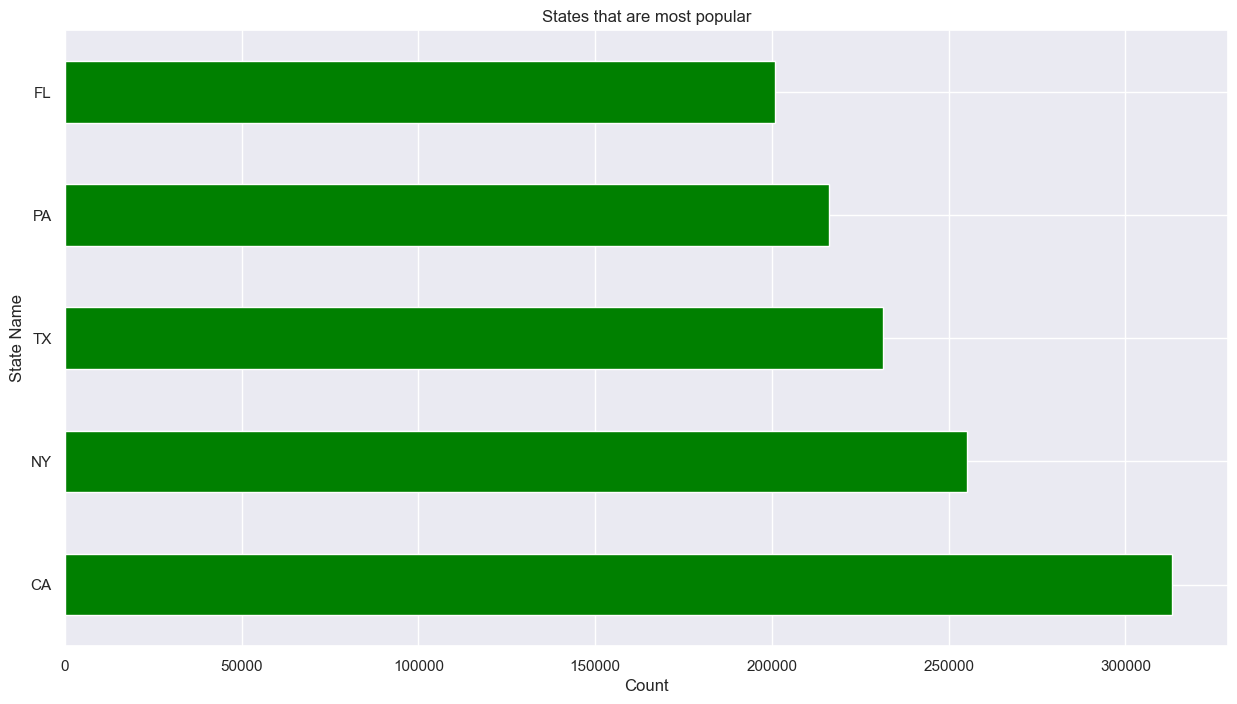

In [27]:
# plotting the 5 most popular states in the dataset
plt.figure(figsize=(15, 8))
top_states = melted.State.value_counts()[:5]
top_states.plot(kind="barh", color='green')  
plt.xlabel("Count")
plt.ylabel("State Name")
plt.title("States that are most popular")
plt.show() 

From the plot we can see that California is the most popular state according to our dataset

In [28]:
melted

,RegionID,RegionCode,SizeRank,City,State,Metro,CountyName,ROI price,%ROI,Date,value
0,84654,60657,1,Chicago,IL,Chicago,Cook,292900.0,5.730851,1996-04,334200.0
1,90668,75070,2,McKinney,TX,Dallas-Fort Worth,Collin,122200.0,8.285652,1996-04,235700.0
2,91982,77494,3,Katy,TX,Houston,Harris,81300.0,4.828700,1996-04,210400.0
3,84616,60614,4,Chicago,IL,Chicago,Cook,378100.0,5.856559,1996-04,498100.0
4,93144,79936,5,El Paso,TX,El Paso,El Paso,9100.0,1.305960,1996-04,77300.0
...,...,...,...,...,...,...,...,...,...,...,...
3625195,99032,97028,14717,Rhododendron,OR,Portland,Clackamas,118700.0,7.165883,2018-04,349300.0
3625196,58333,1338,14719,Ashfield,MA,Greenfield Town,Franklin,34700.0,3.067284,2018-04,209300.0
3625197,59107,3293,14720,Woodstock,NH,Claremont,Grafton,40500.0,3.349430,2018-04,225800.0
3625198,75672,40404,14721,Berea,KY,Richmond,Madison,26300.0,3.727615,2018-04,133400.0


### Bivariate Analysis

In [29]:
# 1. Group data by 'RegionCode' and calculate the mean of '%ROI' within each group
grouped1 = melted.groupby('RegionCode')['%ROI'].mean().reset_index()

# 2. Rename the column to '% ROI'
grouped1 = grouped1.rename(columns={'%ROI': '% ROI'})

# 3. Sort the groups (zip codes) by mean '%ROI' in descending order
grouped1 = grouped1.sort_values(by='% ROI', ascending=False)

# 4. Select the top 10 groups (zip codes) with the highest mean '%ROI'
ten_regioncodes_melted_roi = grouped1.head(10)

# Display the result
print(ten_regioncodes_melted_roi)


       RegionCode      % ROI
11506       85035  22.821813
11490       85008  21.534560
12748       94804  21.468835
12727       94601  20.829750
12720       94590  20.822042
5353        33705  20.679307
12730       94606  20.571366
5277        33460  20.450149
12633       94089  20.309031
11798       89104  20.296485


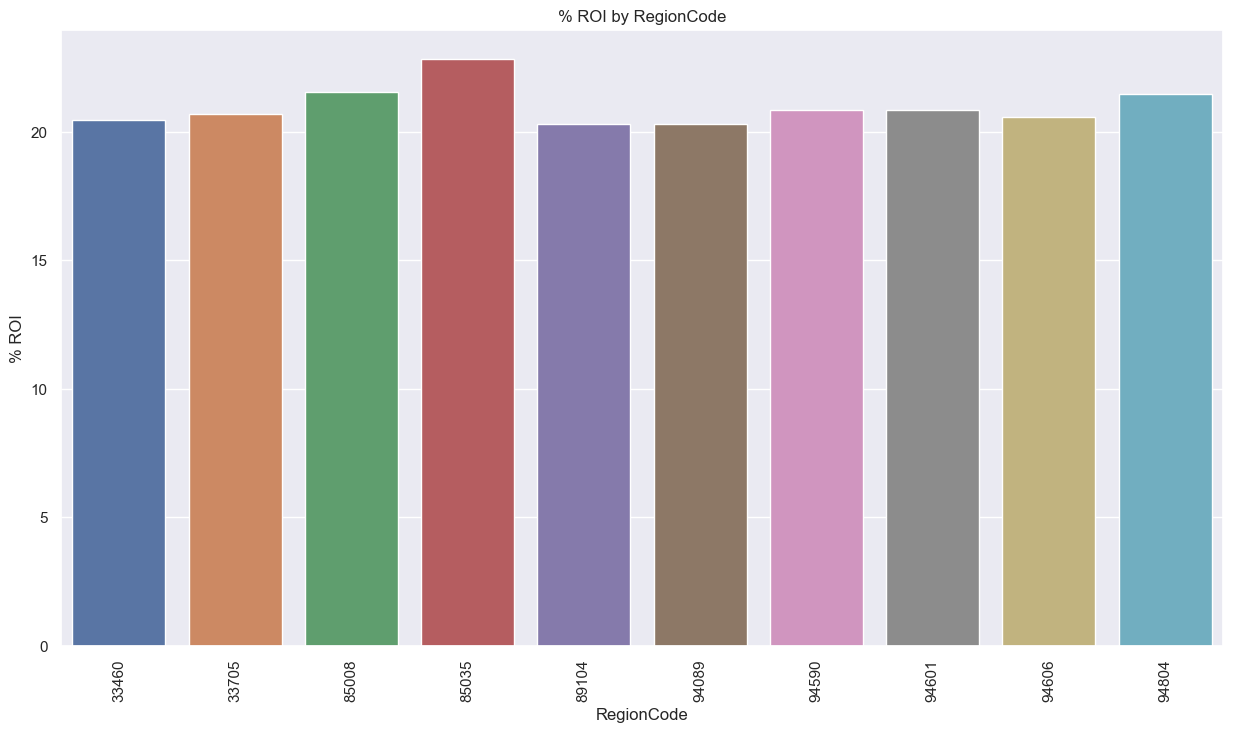

In [30]:
#plotting the mean percentage of the roi
region_codes = ten_regioncodes_melted_roi['RegionCode']
roi_values = ten_regioncodes_melted_roi['% ROI']

# Create the bar plot
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='RegionCode', y='% ROI', data=ten_regioncodes_melted_roi)
plt.xlabel('RegionCode')
plt.ylabel('% ROI')
plt.title('% ROI by RegionCode')
plt.xticks(rotation=90)
plt.show()

from the graph above we can see that the regionCode 85035 has the ROI followed by 85008.

### Looking at the trends over the years

<Figure size 1500x800 with 0 Axes>

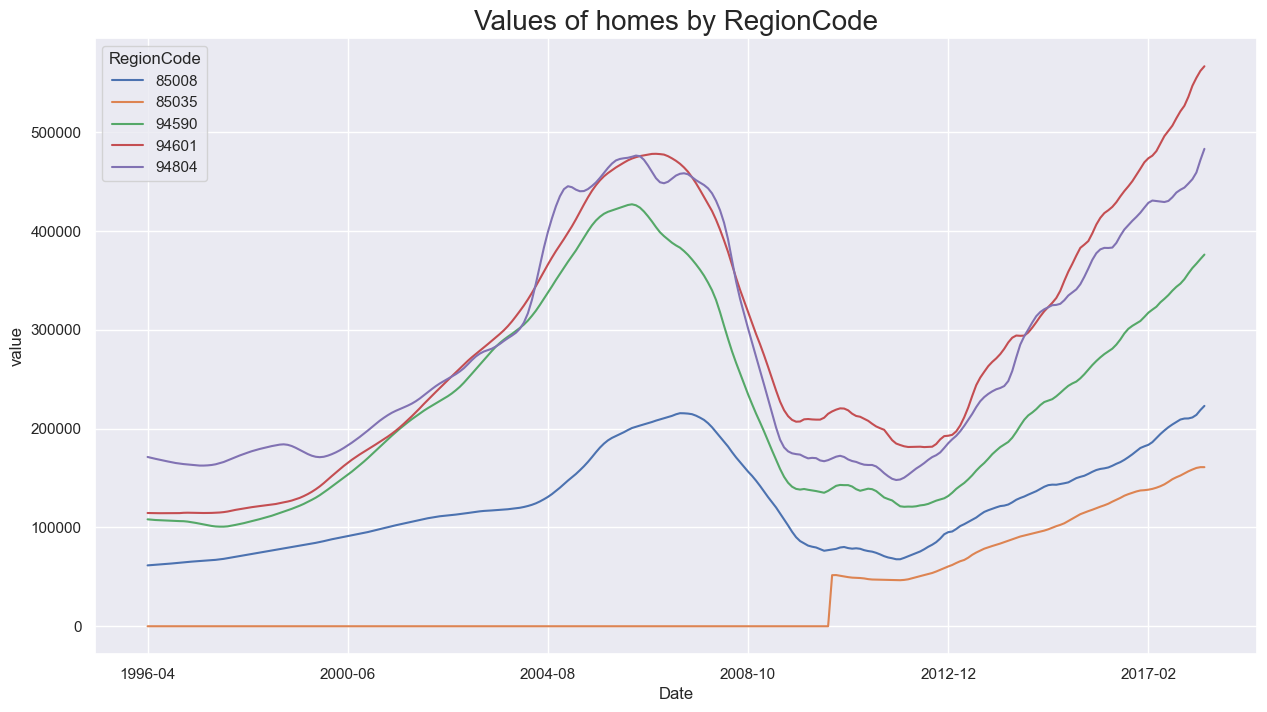

In [31]:
# Creating a function so that we can see the top 5 zipcodes ranked by roi
def top_n_regioncodes_by_roi(data, n=5):
    # Sort the data by '%ROI' in descending order and get the top n RegionCodes
    top_regioncodes = melted.sort_values('%ROI', ascending=False)['RegionCode'].unique()[:n]

    # Filter the DataFrame for the top n region codes
    top_regions = melted[melted['RegionCode'].isin(top_regioncodes)]

    # Group the data by 'Date' and 'RegionCode' and calculate the mean of 'value'
    grouped = top_regions.groupby(['Date', 'RegionCode'])['value'].mean().reset_index()

    # Pivot the data to have RegionCodes as columns and Dates as rows
    piv = grouped.pivot(index='Date', columns='RegionCode', values='value').reset_index()

    return piv

result = top_n_regioncodes_by_roi(melted, n=5)

# Plotting a line graph
plt.figure(figsize=(15, 8))
result.plot(x='Date', kind='line', figsize=(15, 8))
plt.title('Values of homes by RegionCode', fontsize=20)
plt.xlabel('Date')
plt.ylabel('value')
plt.show()

* From the graph above we can see that in the early years the return was low but around the 2000s it began rising and then their was a series of drops in the top 5 regioncodes from around 2006 .We then see the regions struggle to rise but dropped again around 2010 to 2011 then it begins to rise in an upward trend .
* We can also see that there was a regioncode(85035) that that did not have returns for a long time

In [32]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [33]:
melted.head()

,RegionID,RegionCode,SizeRank,City,State,Metro,CountyName,ROI price,%ROI,Date,value
0,84654,60657,1,Chicago,IL,Chicago,Cook,292900.0,5.730851,1996-04,334200.0
1,90668,75070,2,McKinney,TX,Dallas-Fort Worth,Collin,122200.0,8.285652,1996-04,235700.0
2,91982,77494,3,Katy,TX,Houston,Harris,81300.0,4.828700,1996-04,210400.0
3,84616,60614,4,Chicago,IL,Chicago,Cook,378100.0,5.856559,1996-04,498100.0
4,93144,79936,5,El Paso,TX,El Paso,El Paso,9100.0,1.305960,1996-04,77300.0


### Rolling mean and Dickey fuller test

In time series data is not stationary as it changes over time due to things like variance and time.The data can be verified if its stationary by using the Rolling statistics and Dickey fulller test to perform the tests.

In [34]:
#creating a function to see if the time is stationary
def filter_and_group(melted):
    regncodes =melted.sort_values('%ROI', ascending=False)['RegionCode'].unique()[:5]
    five_tops = melted[melted['RegionCode'].isin(regncodes)]
    group = five_tops.groupby(['Date','RegionCode']).mean().reset_index()
    melted1 = group[group['Date'] >= "2005-01-01"]

    return melted
print(melted.head())


   RegionID  RegionCode  SizeRank      City State              Metro   
0     84654       60657         1   Chicago    IL            Chicago  \
1     90668       75070         2  McKinney    TX  Dallas-Fort Worth   
2     91982       77494         3      Katy    TX            Houston   
3     84616       60614         4   Chicago    IL            Chicago   
4     93144       79936         5   El Paso    TX            El Paso   

  CountyName  ROI price      %ROI     Date     value  
0       Cook   292900.0  5.730851  1996-04  334200.0  
1     Collin   122200.0  8.285652  1996-04  235700.0  
2     Harris    81300.0  4.828700  1996-04  210400.0  
3       Cook   378100.0  5.856559  1996-04  498100.0  
4    El Paso     9100.0  1.305960  1996-04   77300.0  


In [35]:
#making a copy of the original database then dropping some columns 
copy_df= melted.copy()
copy_df.drop(columns=['RegionID','SizeRank'], inplace=True)
copy_df.drop(columns=['%ROI', 'ROI price','CountyName','Metro','City','State'], inplace=True)
copy_df.head()

,RegionCode,Date,value
0,60657,1996-04,334200.0
1,75070,1996-04,235700.0
2,77494,1996-04,210400.0
3,60614,1996-04,498100.0
4,79936,1996-04,77300.0


In [36]:
#Creating a dataframe to check for value(price) against region code for the top 5RegionCodes
copy_df['Date'] = pd.to_datetime(copy_df['Date'])
copy_df.set_index('Date', inplace=True)

# Display the initial time series data for the 5 RegionCodes
print('Five RegionCodes:\n', copy_df.head())

# Create individualized time series for each RegionCode.
new_regcode = []
for RegionCode in copy_df.RegionCode.unique():
    # Creating separate dataframes for each RegionCode with a yearly frequency.
    regcode_df = copy_df[copy_df['RegionCode'] == RegionCode].asfreq('MS')

    # Impute missing values using forward fill
    regcode_df = regcode_df.ffill()  

    new_regcode.append(regcode_df)

# Display the time series data for one RegionCode in the list
print(new_regcode[1].head())


Five RegionCodes:
             RegionCode     value
Date                            
1996-04-01       60657  334200.0
1996-04-01       75070  235700.0
1996-04-01       77494  210400.0
1996-04-01       60614  498100.0
1996-04-01       79936   77300.0
            RegionCode     value
Date                            
1996-04-01       75070  235700.0
1996-05-01       75070  236900.0
1996-06-01       75070  236700.0
1996-07-01       75070  235400.0
1996-08-01       75070  233300.0


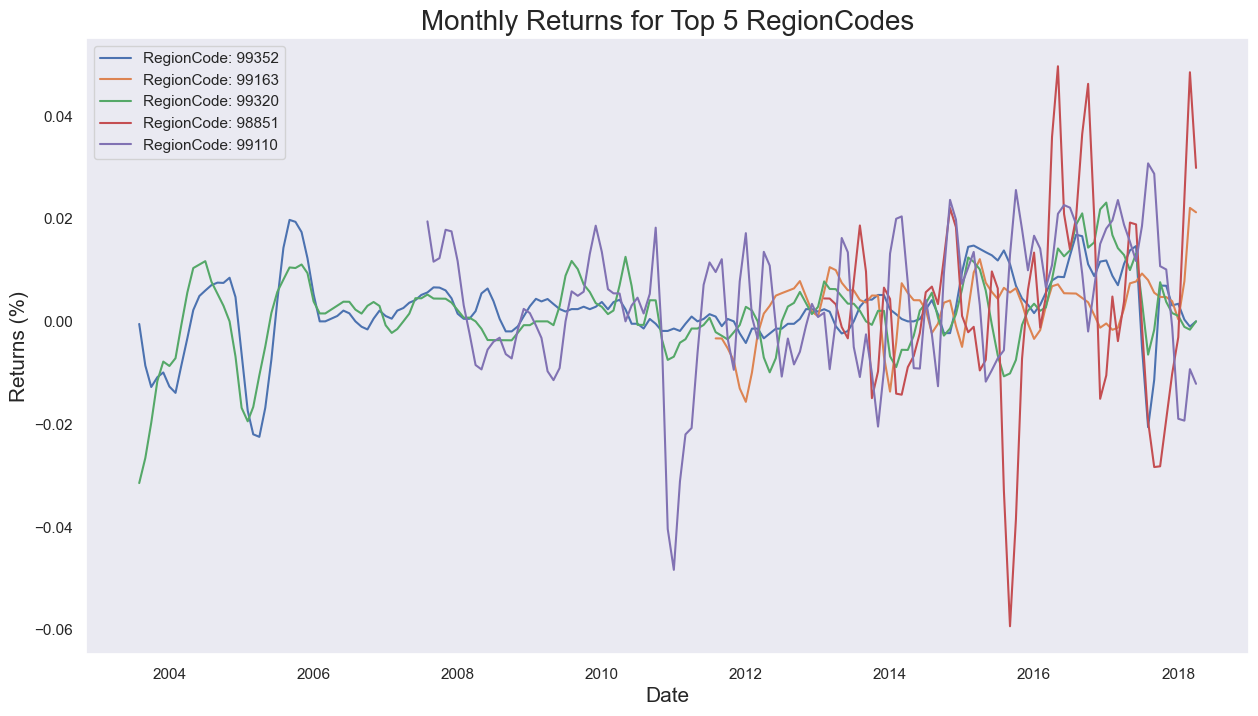

In [37]:
# Calculate and add the 'newc' column for each DF in new_regcode
for df in new_regcode:
    df['newc'] = df['value'].pct_change()

# Calculate the mean returns for each RegionCode and sort by mean returns in descending order
mean_returns_by_region = [(df['newc'].mean(), df['RegionCode'].iloc[0]) for df in new_regcode]
mean_returns_by_region.sort(reverse=True)

# Select the top 5 RegionCodes based on mean returns
top_5_regioncodes = [regioncode for _, regioncode in mean_returns_by_region[:5]]

# Plot the monthly returns for the top 5 RegionCodes
plt.figure(figsize=(15, 8))
for df in new_regcode:
    regioncode = df['RegionCode'].iloc[0]
    if regioncode in top_5_regioncodes:
        plt.plot(df.index, df['newc'], label=f"RegionCode: {regioncode}")

plt.title('Monthly Returns for Top 5 RegionCodes', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Returns (%)', fontsize=15)
plt.legend(loc='best')
plt.grid()
plt.show()

From the graph above we can see that there is no starionarity in the top 5 region codes

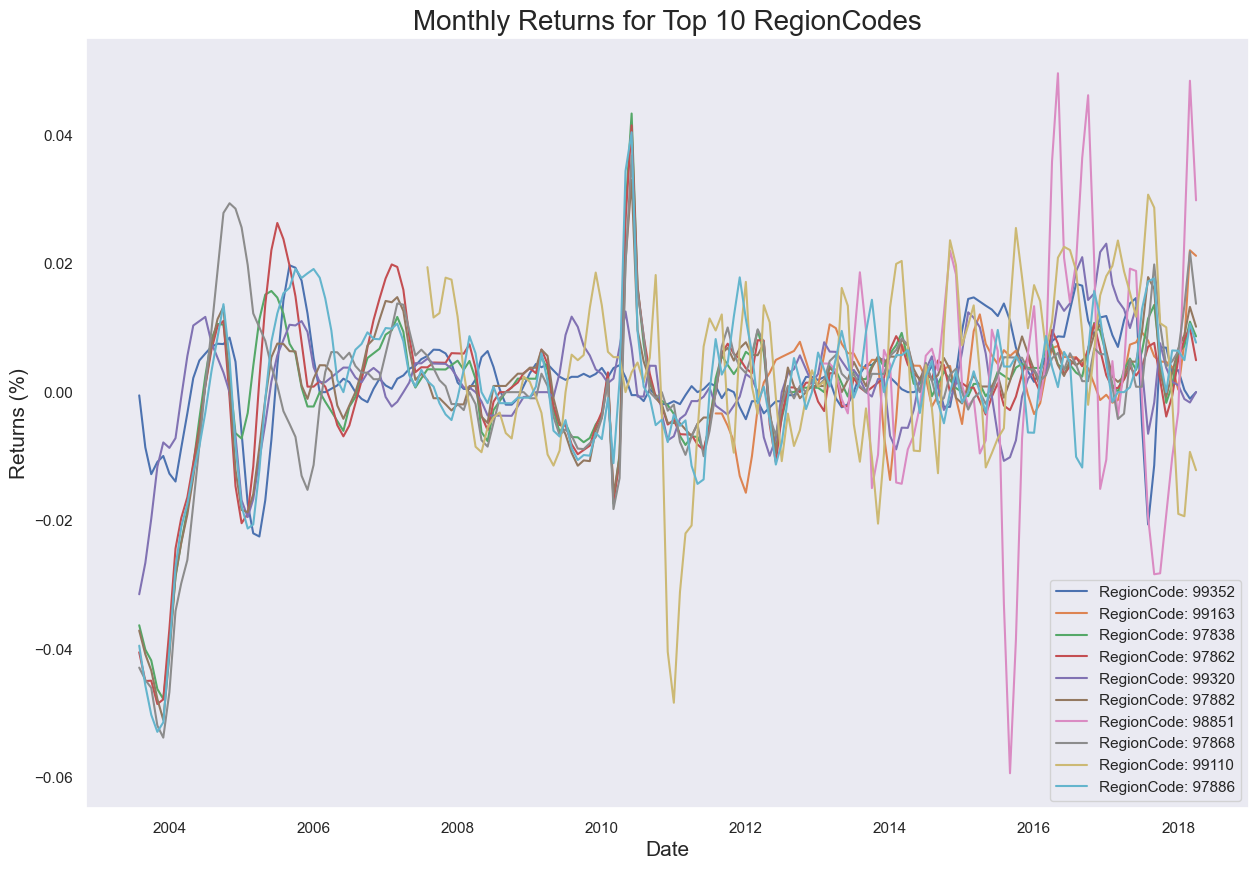

In [38]:
# Calculate and add the 'newc' column for each DataFrame in new_regcode
for df in new_regcode:
    df['newc'] = df['value'].pct_change()

# Calculate the mean returns for each RegionCode and sort by mean returns in descending order
mean_returns_by_region = [(df['newc'].mean(), df['RegionCode'].iloc[0]) for df in new_regcode]
mean_returns_by_region.sort(reverse=True)

# Select the top 10 RegionCodes based on mean returns
top_10_regioncodes = [regioncode for _, regioncode in mean_returns_by_region[:10]]

# Plot the monthly returns for the top 5 RegionCodes
plt.figure(figsize=(15, 10))
for df in new_regcode:
    regioncode = df['RegionCode'].iloc[0]
    if regioncode in top_10_regioncodes:
        plt.plot(df.index, df['newc'], label=f"RegionCode: {regioncode}")

plt.title('Monthly Returns for Top 10 RegionCodes', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Returns (%)', fontsize=15)
plt.legend(loc='best')
plt.grid()
plt.show()

Looking at the graph above we can see also in the top 10 regioncodes that there is still no stationarity.We also see that other regions had serious drops and highs according to our graph.

### Rolling statistics

In [40]:
# Convert the 'value' column to numeric, and set errors='coerce' to handle non-numeric values as NaN
price_over_time = copy_df.copy()
price_over_time['value'] = pd.to_numeric(price_over_time['value'], errors='coerce')

# calculating rolling mean and standard deviation
roll_mean = price_over_time['value'].rolling(window=12, center=False).mean()
roll_std = price_over_time['value'].rolling(window=12, center=False).std()

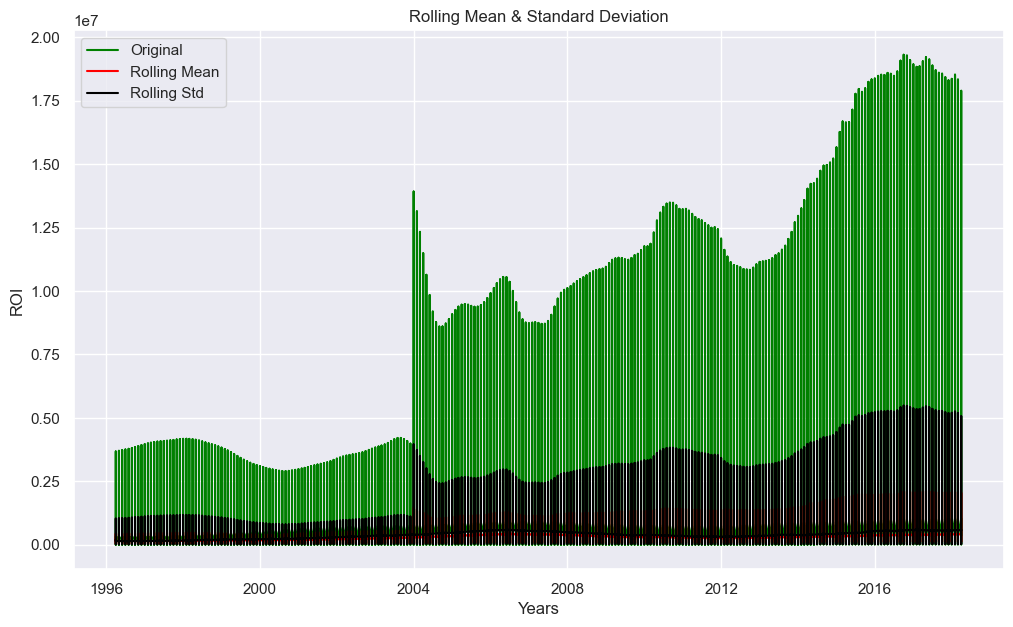

In [41]:
# Plot the data
fig = plt.figure(figsize=(12, 7))
plt.plot(price_over_time.index, price_over_time['value'], color='green', label='Original')
plt.plot(price_over_time.index, roll_mean, color='red', label='Rolling Mean')
plt.plot(price_over_time.index, roll_std, color='black', label='Rolling Std')
plt.xlabel('Years')
plt.ylabel('ROI')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

From the graph we can visualize that the value changed over time and in 2004 is when the market began picking and since then it has been ascending in value and returns on investment.

### Dickey-Fuller test

In [65]:
# A Dickey fuller test for the top 5 region codes
for f in new_regcode:
    regioncode = f['RegionCode'].iloc[0]
    if regioncode in top_5_regioncodes:
        # Calculate nobs based on your data
        nobs = len(f['value'].dropna())  # Number of observations

        # Calculate the maximum allowed maxlag
        maxlag_max = nobs // 2 - 1

        # Choose an appropriate maxlag value 
        maxlag = min(5, maxlag_max)

        # Perform the ADFuller test with the chosen maxlag on the 'value' column
        adfull = adfuller(f['value'].dropna(), maxlag=maxlag)

        print(f'The p-value for ADFuller test in RegionCode: {regioncode}')
        print('p-value:', adfull[1])

        # Looking for stationarity based on p-value
        alpha = 0.05
        if adfull[1] > alpha:
            print('Fail to reject the null hypothesis.')
            print('Data is not stationary .\n')
        else:
            print('Reject the null hypothesis.')
            print('Data is stationary (p-value <= 0.05).\n')       

The p-value for ADFuller test in RegionCode: 99352
p-value: 0.775816715261199
Fail to reject the null hypothesis.
Data is not stationary .

The p-value for ADFuller test in RegionCode: 99163
p-value: 0.9368206486634503
Fail to reject the null hypothesis.
Data is not stationary .

The p-value for ADFuller test in RegionCode: 99320
p-value: 0.7196257090092844
Fail to reject the null hypothesis.
Data is not stationary .

The p-value for ADFuller test in RegionCode: 98851
p-value: 0.9355686156715145
Fail to reject the null hypothesis.
Data is not stationary .

The p-value for ADFuller test in RegionCode: 99110
p-value: 0.9208956611417216
Fail to reject the null hypothesis.
Data is not stationary .



In [43]:
## Differencing the non-stationary region codes
for i in [0,1,2,3,4]:
    #Perform adfuller test and drop NaN values created when calculating monthly returns.
    results = adfuller(new_regcode[i].newc.diff().dropna())
    print(f'ADFuller test p-value for zipcode: {new_regcode[i].RegionCode[0]}')
    print('p-value:',results[1])
    
    if results[1]>0.05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
    else:
        print('Reject the null hypothesis. Data is stationary.\n')

ADFuller test p-value for zipcode: 60657
p-value: 0.005414285605060719
Reject the null hypothesis. Data is stationary.

ADFuller test p-value for zipcode: 75070
p-value: 8.146683470088598e-13
Reject the null hypothesis. Data is stationary.

ADFuller test p-value for zipcode: 77494
p-value: 1.9615399635663222e-13
Reject the null hypothesis. Data is stationary.

ADFuller test p-value for zipcode: 60614
p-value: 5.633782432976412e-05
Reject the null hypothesis. Data is stationary.

ADFuller test p-value for zipcode: 79936
p-value: 8.750397346680227e-08
Reject the null hypothesis. Data is stationary.



### Modelling

In [44]:
#separating the timeseries so that they can be each by itself
# Define a list of region codes
regioncodes = ['60657', '75070', '77494', '60614', '79936']

# Create a dictionary to store the time series data
region_ts_dict = {}

# Iterate through the region codes and calculate the time series
for regioncode, i in zip(regioncodes, range(5)):
    ts = new_regcode[i].newc if regioncode == '60657' else new_regcode[i].newc.diff()
    ts = ts.dropna()
    region_ts_dict[f'timeseries_{regioncode}'] = ts

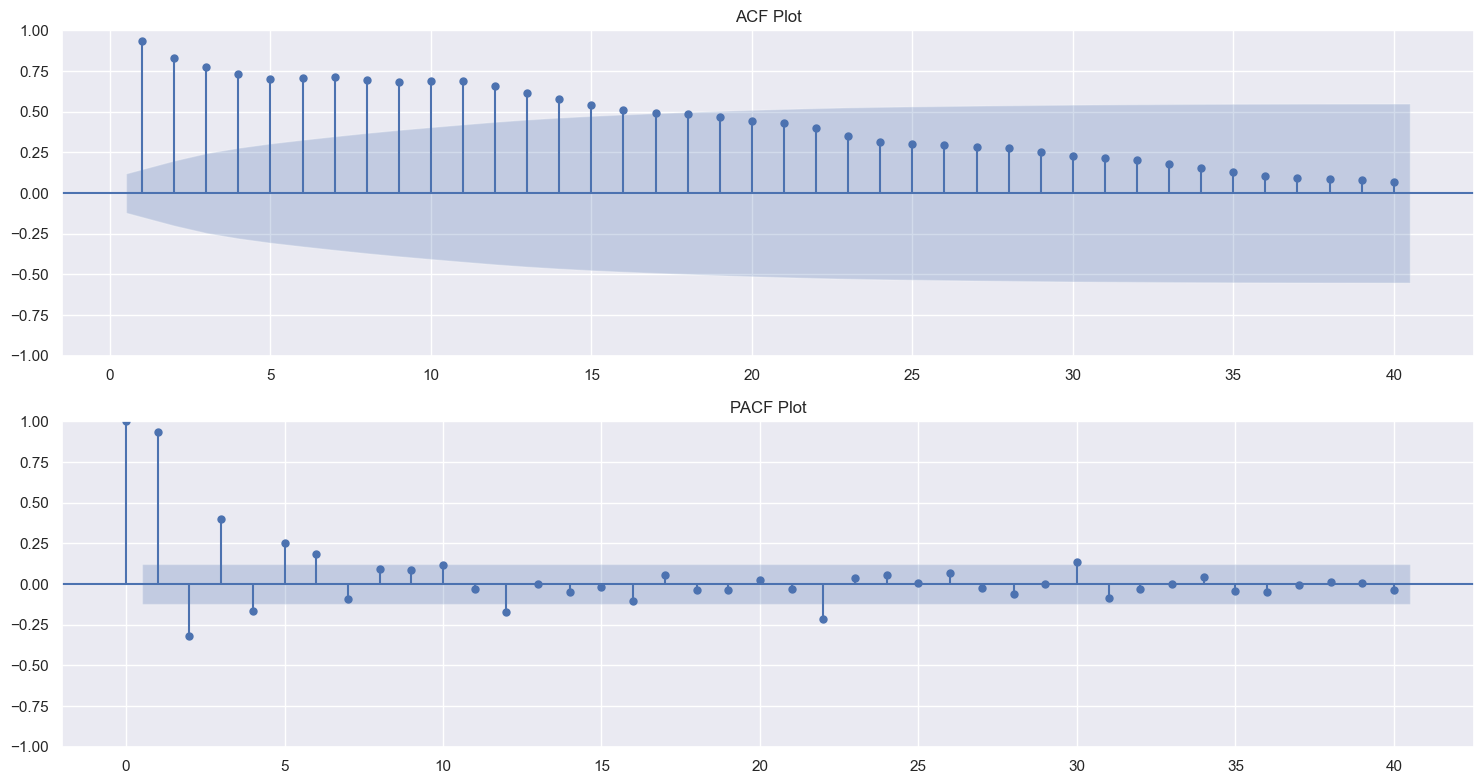

In [45]:

def acf_pacf(df, alags=40, plags=40):
    # Create figure
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8))
    
    # Make ACF plot
    plot_acf(df, lags=alags, zero=False, ax=ax1)
    ax1.set_title('ACF Plot')
    
    # Make PACF plot
    plot_pacf(df, lags=plags, ax=ax2)
    ax2.set_title('PACF Plot')
    
    plt.tight_layout()
    plt.show()


# Plot ACF and PACF for 60657
acf_pacf(region_ts_dict['timeseries_60657'])


In [46]:
# using arima to find the best p, d, q 
model_arima = pm.auto_arima(region_ts_dict['timeseries_60657'], 
                            trace=True, 
                            error_action='ignore', 
                            suppress_warnings=True, 
                            stepwise=True)
model_arima.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2563.752, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2452.675, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2480.053, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2538.215, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2454.640, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-2542.385, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2566.147, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2529.368, Time=0.35 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-2545.740, Time=0.13 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-2564.222, Time=0.30 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-2556.025, Time=0.37 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-2565.247, Time=0.55 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-2568.113, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-2531.367, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(2, 1, 1)   Log Likelihood                1288.057
Date:                Sat, 16 Sep 2023   AIC                          -2568.113
Time:                        12:02:46   BIC                          -2553.825
Sample:                    05-01-1996   HQIC                         -2562.371
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1376      0.061      2.270      0.023       0.019       0.256
ar.L2         -0.3705      0.045     -8.156      0.000      -0.460      -0.282
ma.L1          0.4493      0.066      6.786      0.000       0.320       0.579
sigma2      3.235e-06   1.78e-07     18.207      0.000    2.89e-06    3.58e-06
===================================================================================
Ljung-Box (L1) (Q):                   1.04   Jarque-Bera (JB):               136.76
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):              15.67   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

From the summary above we can see that the best model is (2,1,1)

The log likelihood measures how well the model fits the data,the higher the likelihood value which is from our model(1288.057) indicates a good fit.

The Ljung-Box statistic tests for autocorrelation in the residuals. In this case, the value is 1.04 with a p-value of 0.31, means that there is no significant autocorrelation.

We can see that the Jarque-Bera test assesses the normality of the residuals. As for our p-value 0.00 suggests that the residuals are not normally distributed.

Heteroskedasticity (H) indicates whether there is changing variance in the residuals in our summary we have a value of 15.67 which shows that there is the presence of heteroskedasticity.

Skewness measures the asymmetry of the residuals. A value near zero (-0.12) shows relatively symmetrical residuals.

Kurtosis in this case, a value of 6.52 suggests that the residuals have heavier tails than a normal distribution.

### Testing and fitting the model

In [47]:
#splitting the data into train and test
train_data = region_ts_dict['timeseries_60657'][:'2016-01']
test_data = region_ts_dict['timeseries_60657']['2016-02':]

In [48]:
# Initializing the ARIMA model
arima_mod = ARIMA(region_ts_dict['timeseries_60657'], order=(2, 1, 1))

# Fitting the model
arima_result = arima_mod.fit()

# Looking at the summary
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                   newc   No. Observations:                  264
Model:                 ARIMA(2, 1, 1)   Log Likelihood                1288.057
Date:                Sat, 16 Sep 2023   AIC                          -2568.113
Time:                        12:02:47   BIC                          -2553.825
Sample:                    05-01-1996   HQIC                         -2562.371
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1376      0.061      2.270      0.023       0.019       0.256
ar.L2         -0.3705      0.045     -8.156      0.000      -0.460      -0.282
ma.L1          0.4493      0.066      6.786      0.0

Log likelihood measures how well the model fits the data, the higher the values the better the fit. In our model case, a Log Likelihood of 1288.057 means that the model is a good fit for our data.

z: The z-statistic measures how many standard errors the coefficient estimate is away from zero. It's used to assess the significance of each coefficient. In our model, z-statistic of 2.270 for "ar.L1" means that this coefficient is statistically significant at a 95% confidence level because it's greater than 2.

P>|z|:Low p-values (typically below 0.05) indicate that the corresponding coefficient is statistically significant. In our model, the p-values for all coefficients are  close to zero, which means that they are statistically significance.

Ljung-Box (L1) (Q) tests for autocorrelation in the residuals, from our model we have a p-value that is greater than 0.05 (0.31) this means  that  there is no significant autocorrelation in the residuals.

Jarque-Bera (JB) tests for normality of the residuals and hence a low p-value (0.00) suggests that the residuals are not normally distributed

In [56]:
# Define the prediction start and end dates
start_date = pd.to_datetime('2015-02')
end_date = pd.to_datetime('2018-04')

# Make predictions using the fitted model
pred = arima_result.predict(start=start_date, end=end_date, dynamic=False)

# Display the first few rows of the prediction intervals
print(pred.head())


Date
2015-02-01   -0.000224
2015-03-01    0.004278
2015-04-01    0.007933
2015-05-01    0.008185
2015-06-01    0.004038
Freq: MS, Name: predicted_mean, dtype: float64


In [59]:
# Define the confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the standard error of the forecast
std_error = np.std(arima_result.resid)

# Get the degrees of freedom (usually equal to the number of observations - model order)
degrees_of_freedom = len(train_data) - 3  # Adjust the value based on your ARIMA order

# Calculate the t-score for the desired confidence level and degrees of freedom
from scipy.stats import t
t_score = t.ppf((1 + confidence_level) / 2, df=degrees_of_freedom)

# Calculate the margin of error
margin_of_error = t_score * std_error

# Calculate the lower and upper bounds of the prediction interval
lower_bound = pred - margin_of_error
upper_bound = pred + margin_of_error

# Combine the lower and upper bounds into a DataFrame
pred_intervals = pd.DataFrame({'Lower': lower_bound, 'Upper': upper_bound})

# Display the first few rows of the prediction intervals
print(pred_intervals.head())


               Lower     Upper
Date                          
2015-02-01 -0.003797  0.003349
2015-03-01  0.000705  0.007851
2015-04-01  0.004359  0.011506
2015-05-01  0.004611  0.011758
2015-06-01  0.000465  0.007611


### Evaluation of the model

In [64]:
# # Getting the mse and rmse for the model

# Assuming that region_ts_dict['timeseries_60657'] contains the actual data
actual_data = region_ts_dict['timeseries_60657']

# Define the start and end dates for the evaluation period
start_date = pd.to_datetime('2016-01')
end_date = pd.to_datetime('2018-01')

# Trim actual_data to match the evaluation period
actual_data = actual_data[start_date:end_date]

# Trim pred to match the length of actual_data
pred = pred[start_date:end_date]

# Calculate the mean squared error
mse = mean_squared_error(actual_data, pred)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 4.79405230578129e-06
Root Mean Squared Error (RMSE): 0.0021895324399929064


We can see an MSE of approximately 4.79405230578129e-06 means that the squared difference between the ARIMA model's predictions and the actual values for the evaluation period is very close to zero. This means that our model is making accurate predictions.

We have an RMSE of approximately 0.0021895324399929064 this means that, on average the absolute difference between your ARIMA model's predictions and the actual values for the evaluation period is approximately 0.0022 units. This indicates that our model's predictions are quite close to the actual values.

Both the low MSE and low RMSE values suggest that our ARIMA model is performing well in terms of prediction accuracy for the evaluation period. The model's predictions are, on average, very close to the actual values. 

### Conclusion

From the Zillow Real Estate database, I have concluded that :-

1. Real estate is being appreciated 

2. There is high return  on investment in real estate

3. There are zipcodes to invest in that are at the top 5 Regioncodes (states, cities and counties).

4. The model created is has a 0.95 confidence interval.

### Recommendation 

1. Real estate is being appreciated - From the data we have seen that , more and more people are appreciating real estate in that people are looking to mostly buy homes and other than being tenants.

2. There is high return on investment in real estate - From the dataset we have seen that the return on investment has risen over  the years and it keeps rising.

* This means that people are buying homes and can either rent them out to bring them more money using the monthly pay or selling it after some time and making a profit from the initial pricing that they had bought it as.

* This can also mean that some improvements have been done to the property hence increasing its value.

3. There are zipcodes to invest in that are at the top 5 Regioncodes - From the zillow data that we have seen which regioncodes are the top fives that have boon invested on in terms of real estate .The top 5 regioncodes are the best to invest in .  

4. The model created has a 0.95 confidence interval - From the model we have found out that it works and can also be used to help in predictions in the future . 